In [1]:

# from google.colab import drive
# drive.mount('/content/drive')
# !pwd

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
#This notebook contains data balancing using undersampling and comparision of various models for star/rating prediction on Yelp dataset.

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.svm import LinearSVC
import pickle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier


In [5]:
import pandas as pd
df =pd.read_csv("/kaggle/input/yelpdataseths/hrdata_modified3.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,text,review_stars,tokens,lemma,stems
0,0,0,What a great addition to the Funk Zone! Grab ...,5,"['What', 'a', 'great', 'addition', 'to', 'the'...",What a great addition to the Funk Zone Grab a ...,what a great addit to the funk zone grab a bit...
1,1,1,Possibly the best breakfast sandwich EVER. On...,5,"['Possibly', 'the', 'best', 'breakfast', 'sand...",Possibly the best breakfast sandwich EVER On a...,possibl the best breakfast sandwich ever on a ...
2,2,2,Pricey ( a ham and cheese croissant was $5.50)...,4,"['Pricey', 'a', 'ham', 'and', 'cheese', 'crois...",Pricey a ham and cheese croissant wa 5 50 a wi...,pricey a ham and chees croissant wa 5 50 as wi...
3,3,3,Are you kidding me? This is without a doubt so...,5,"['Are', 'you', 'kidding', 'me', 'This', 'is', ...",Are you kidding me This is without a doubt som...,are you kid me thi is without a doubt some of ...
4,4,4,"Super slow service, ""salads"" are not very good...",2,"['Super', 'slow', 'service', 'salads', 'are', ...",Super slow service salad are not very good and...,super slow servic salad are not veri good and ...


In [6]:
X = df['lemma']
y = df['review_stars']
X_try=X.tolist()
X_try=np.array(X_try)
X_try=X_try.reshape(-1,1)

#undersampling using random undersampler
rus = RandomUnderSampler(random_state=777)
X_RUS, y_RUS = rus.fit_resample(X_try, y)
print(X_RUS.shape)
X_train, x_test, Y_train, y_test = train_test_split(X_RUS,y_RUS,test_size=0.3,random_state=42)

(39525, 1)


Training set score: 0.871652148769292
Test set score: 0.5369370888851408
              precision    recall  f1-score   support

           1       0.64      0.68      0.66      2428
           2       0.45      0.42      0.43      2356
           3       0.43      0.42      0.42      2275
           4       0.49      0.45      0.47      2391
           5       0.64      0.70      0.67      2408

    accuracy                           0.54     11858
   macro avg       0.53      0.53      0.53     11858
weighted avg       0.53      0.54      0.53     11858



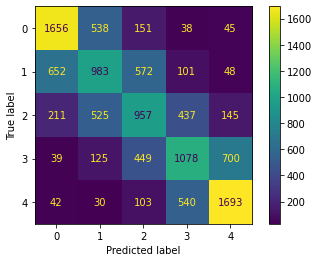

In [7]:
#model 1 linear support vector machine
newpipeline = Pipeline([('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()), 
    ('clf', LinearSVC())])
X_train= X_train.flatten()
x_test= x_test.flatten()

newpipeline.fit(X_train,Y_train) #training the model

#testing accuracy

print('Training set score: ' + str(newpipeline.score(X_train,Y_train)))
print('Test set score: ' + str(newpipeline.score(x_test,y_test)))

#prediction
yhat=newpipeline.predict(x_test)

#plotting matrix
cm=confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#printing scores
print(metrics.classification_report(y_test, yhat))

#pickle dumping
with open('svc_oversample.pickle', 'wb') as f:
    pickle.dump(newpipeline, f)
with open('svc_oversample.pickle', 'rb') as f:
    loadedpipe = pickle.load(f)
testing=loadedpipe.predict(["This is a good restaurant, but #model 1 linear support vector machine
newpipeline = Pipeline([('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()), 
    ('clf', LinearSVC())])
X_train= X_train.flatten()
x_test= x_test.flatten()

newpipeline.fit(X_train,Y_train) #training the model

#testing accuracy

print('Training set score: ' + str(newpipeline.score(X_train,Y_train)))
print('Test set score: ' + str(newpipeline.score(x_test,y_test)))

#prediction
yhat=newpipeline.predict(x_test)

#plotting matrix
cm=confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#printing scores
print(metrics.classification_report(y_test, yhat))

#pickle dumping
with open('svc_oversample.pickle', 'wb') as f:
    pickle.dump(newpipeline, f)
with open('svc_oversample.pickle', 'rb') as f:
    loadedpipe = pickle.load(f)
testing=loadedpipe.predict(["This is a good restaurant"])
print("star prediction: "+str(testing[0]))
test_df=pd.DataFrame(
    data={
        'text' : X_RUS.flatten(),
        'stars' : y_RUS
    }
)
test_df.shape
test_df.to_csv('undersampled_dataset.csv', index=False)"])
print("star prediction: "+str(testing[0]))
test_df=pd.DataFrame(
    data={
        'text' : X_RUS.flatten(),
        'stars' : y_RUS
    }
)
test_df.shape
test_df.to_csv('undersampled_dataset.csv', index=False)

Training set score: 0.9997469910001084
Test set score: 0.3704671951425198
              precision    recall  f1-score   support

           1       0.48      0.45      0.47      2428
           2       0.30      0.30      0.30      2356
           3       0.28      0.31      0.29      2275
           4       0.32      0.32      0.32      2391
           5       0.48      0.47      0.47      2408

    accuracy                           0.37     11858
   macro avg       0.37      0.37      0.37     11858
weighted avg       0.37      0.37      0.37     11858



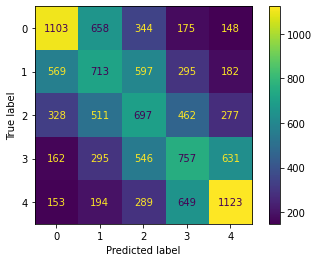

In [8]:
#model 2 decision tree classifier
newpipeline2 = Pipeline([('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()), 
    ('clf', DecisionTreeClassifier())])
X_train= X_train.flatten()
x_test= x_test.flatten()

newpipeline2.fit(X_train,Y_train) #training the model

#testing accuracy

print('Training set score: ' + str(newpipeline2.score(X_train,Y_train)))
print('Test set score: ' + str(newpipeline2.score(x_test,y_test)))

#prediction
yhat=newpipeline2.predict(x_test)

#plotting matrix
cm=confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#printing scores
print(metrics.classification_report(y_test, yhat))

#pickle dumping
with open('svc_oversample.pickle', 'wb') as f:
    pickle.dump(newpipeline, f)
with open('svc_oversample.pickle', 'rb') as f:
    loadedpipe = pickle.load(f)
testing=loadedpipe.predict(["This is a good restaurant, but the service is average"])
print("star prediction: "+str(testing[0]))
test_df=pd.DataFrame(
    data={
        'text' : X_RUS.flatten(),
        'stars' : y_RUS
    }
)
test_df.shape
test_df.to_csv('undersampled_dataset.csv', index=False)

Training set score: 0.9997469910001084
Test set score: 0.5103727441389779
              precision    recall  f1-score   support

           1       0.59      0.74      0.66      2428
           2       0.43      0.34      0.38      2356
           3       0.41      0.42      0.41      2275
           4       0.47      0.34      0.39      2391
           5       0.59      0.70      0.64      2408

    accuracy                           0.51     11858
   macro avg       0.50      0.51      0.50     11858
weighted avg       0.50      0.51      0.50     11858



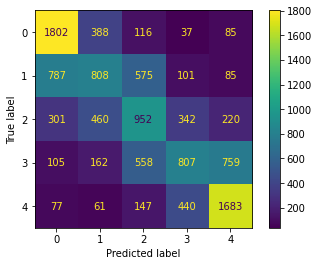

In [9]:
#model 3 random forestclassifier
newpipeline3 = Pipeline([('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()), 
    ('clf', RandomForestClassifier())])
X_train= X_train.flatten()
x_test= x_test.flatten()

newpipeline3.fit(X_train,Y_train) #training the model

#testing accuracy

print('Training set score: ' + str(newpipeline3.score(X_train,Y_train)))
print('Test set score: ' + str(newpipeline3.score(x_test,y_test)))

#prediction
yhat=newpipeline3.predict(x_test)

#plotting matrix
cm=confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#printing scores
print(metrics.classification_report(y_test, yhat))

#pickle dumping
with open('svc_oversample.pickle', 'wb') as f:
    pickle.dump(newpipeline, f)
with open('svc_oversample.pickle', 'rb') as f:
    loadedpipe = pickle.load(f)
testing=loadedpipe.predict(["This is a good restaurant, but the service is average"])
print("star prediction: "+str(testing[0]))
test_df=pd.DataFrame(
    data={
        'text' : X_RUS.flatten(),
        'stars' : y_RUS
    }
)
test_df.shape
test_df.to_csv('undersampled_dataset.csv', index=False)

Training set score: 0.5868724473199118
Test set score: 0.3680215888008096
              precision    recall  f1-score   support

           1       0.45      0.59      0.51      2428
           2       0.29      0.31      0.30      2356
           3       0.27      0.31      0.29      2275
           4       0.35      0.28      0.31      2391
           5       0.52      0.34      0.41      2408

    accuracy                           0.37     11858
   macro avg       0.37      0.37      0.36     11858
weighted avg       0.38      0.37      0.37     11858

star prediction: 3


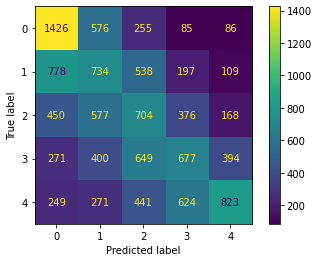

In [13]:
#model 4 KNN
newpipeline4 = Pipeline([('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()), 
    ('clf', KNeighborsClassifier())])
X_train= X_train.flatten()
x_test= x_test.flatten()

newpipeline4.fit(X_train,Y_train) #training the model

#testing accuracy

print('Training set score: ' + str(newpipeline4.score(X_train,Y_train)))
print('Test set score: ' + str(newpipeline4.score(x_test,y_test)))

#prediction
yhat=newpipeline4.predict(x_test)

#plotting matrix
cm=confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#printing scores
print(metrics.classification_report(y_test, yhat))

#pickle dumping
with open('svc_oversample.pickle', 'wb') as f:
    pickle.dump(newpipeline4, f)
with open('svc_oversample.pickle', 'rb') as f:
    loadedpipe = pickle.load(f)
testing=loadedpipe.predict(["This is a good restaurant, but the service is average"])
print("star prediction: "+str(testing[0]))
test_df=pd.DataFrame(
    data={
        'text' : X_RUS.flatten(),
        'stars' : y_RUS
    }
)
test_df.shape
test_df.to_csv('undersampled_dataset.csv', index=False)

Training set score: 0.4984277297863881
Test set score: 0.4907235621521336
              precision    recall  f1-score   support

           1       0.57      0.66      0.61      2428
           2       0.42      0.35      0.38      2356
           3       0.39      0.37      0.38      2275
           4       0.44      0.40      0.42      2391
           5       0.58      0.67      0.62      2408

    accuracy                           0.49     11858
   macro avg       0.48      0.49      0.48     11858
weighted avg       0.48      0.49      0.48     11858

star prediction: 3


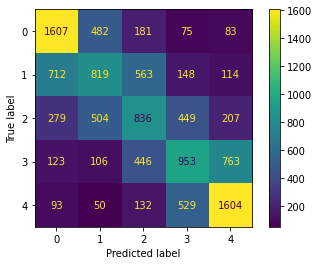

In [17]:
#model 5 adaboost
newpipeline5 = Pipeline([('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()), 
    ('clf', AdaBoostClassifier())])
X_train= X_train.flatten()
x_test= x_test.flatten()

newpipeline5.fit(X_train,Y_train) #training the model

#testing accuracy

print('Training set score: ' + str(newpipeline5.score(X_train,Y_train)))
print('Test set score: ' + str(newpipeline5.score(x_test,y_test)))

#prediction
yhat=newpipeline5.predict(x_test)

#plotting matrix
cm=confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#printing scores
print(metrics.classification_report(y_test, yhat))

#pickle dumping
with open('svc_oversample.pickle', 'wb') as f:
    pickle.dump(newpipeline5, f)
with open('svc_oversample.pickle', 'rb') as f:
    loadedpipe = pickle.load(f)
testing=loadedpipe.predict(["This is a good restaurant, but the service is average"])
print("star prediction: "+ str(testing[0]))
test_df=pd.DataFrame(
    data={
        'text' : X_RUS.flatten(),
        'stars' : y_RUS
    }
)
test_df.shape
test_df.to_csv('undersampled_dataset.csv', index=False)

In [ ]:
#model 1 linear support vector machine
newpipeline6= Pipeline([('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()), 
    ('clf', LogisticRegression())])
X_train= X_train.flatten()
x_test= x_test.flatten()

newpipeline6.fit(X_train,Y_train) #training the model

#testing accuracy

print('Training set score: ' + str(newpipeline6.score(X_train,Y_train)))
print('Test set score: ' + str(newpipeline6.score(x_test,y_test)))

#prediction
yhat=newpipeline6.predict(x_test)

#plotting matrix
cm=confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#printing scores
print(metrics.classification_report(y_test, yhat))

#pickle dumping
with open('svc_oversample.pickle', 'wb') as f:
    pickle.dump(newpipeline6, f)
with open('svc_oversample.pickle', 'rb') as f:
    loadedpipe = pickle.load(f)
testing=loadedpipe.predict(["This is a good restaurant, but the service is average"])
print("star prediction: "+str(testing[0]))
test_df=pd.DataFrame(
    data={
        'text' : X_RUS.flatten(),
        'stars' : y_RUS
    }
)
test_df.shape
test_df.to_csv('undersampled_dataset.csv', index=False)

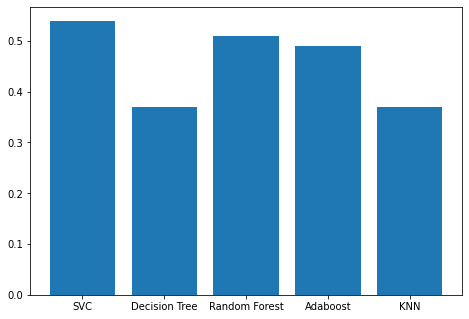

In [18]:
Accuracy = [0.54, 0.37,0.51, 0.49, 0.37]
models = ['SVC', 'Decision Tree','Random Forest', 'Adaboost', 'KNN']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(models,Accuracy)
plt.show()